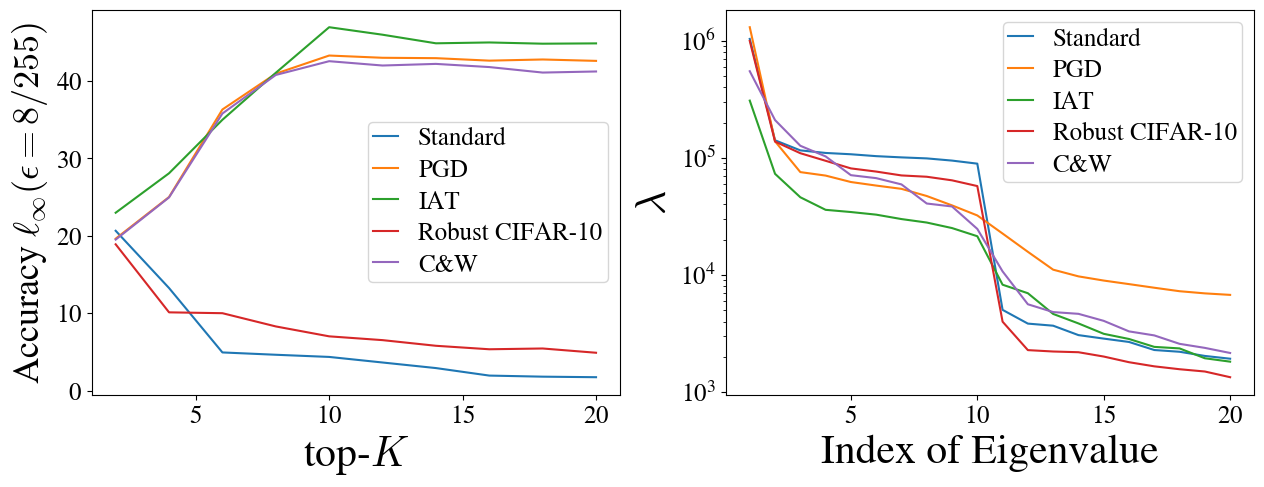

In [43]:
import torch
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
# Matplotlib settings
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rcParams['savefig.dpi'] = 600       
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.formatter.limits']=(-3, 3)
mpl.rcParams['axes.formatter.use_mathtext']=True

mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
mpl.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
mpl.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['legend.labelspacing'] = 0.3
mpl.rcParams['legend.borderpad'] = 0.2
mpl.rcParams['legend.handlelength'] = 1
checkpoints = ['basic_training', 'pgd_adversarial_training', 
               'interpolated_adversarial_training', 
               'basic_training_with_robust_dataset',
              'carlini_training']
nicknames = ['Standard', 'PGD','IAT', 'Robust CIFAR-10', 'C&W']
k=[2,4,6,8,10,12,14,16,18,20]
acc=[[20.65, 13.25, 4.93, 4.63, 4.35, 3.63, 2.91, 1.94, 1.80, 1.73],
    [19.63, 25.01, 36.32, 40.95, 43.29, 43.00, 42.95, 42.63, 42.78, 42.60],
    [22.98, 28.08, 34.99, 41.06, 46.95, 45.98, 44.87, 44.98, 44.82, 44.86 ],
    [18.90, 10.11, 10.00, 8.29, 7.01, 6.52, 5.79, 5.34, 5.44, 4.89],
    [19.51, 24.96, 35.80, 40.78, 42.56, 42.00, 42.21, 41.80, 41.09, 41.23]]
fig = plt.figure(figsize=(15,5))
gs = matplotlib.gridspec.GridSpec(1, 2, width_ratios=[2, 2]) 
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
for i in range(len(checkpoints)):
    value = torch.load(checkpoints[i]+'_values.pt').numpy()
    #eigenvalues.append(value.numpy())
    value.sort()
    #spline1 = UnivariateSpline(k, acc[i])
    ax1.plot(k,acc[i],label=nicknames[i])
    spline2 = UnivariateSpline(range(1,21), value[::-1][:20])
    ax2.plot(range(1,21),spline2(range(1,21)), label=nicknames[i])
ax2.set_ylabel("$\lambda$",fontsize=30)
ax1.set_ylabel('Accuracy $\ell_{\infty}(\epsilon=8/255)$',fontsize=26)
ax1.set_xlabel("top-$K$",fontsize=30)
ax2.set_xlabel("Index of Eigenvalue",fontsize=30)
ax2.set_yscale('log')
#ax2.set_xscale('log')
ax1.legend()
ax2.legend()
ax1.legend(fontsize=18)
ax2.legend(fontsize=18)
#ax1.set_ylim(0,50)
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax2.tick_params(axis='x', labelsize=18)
ax2.tick_params(axis='y', labelsize=18)
plt.savefig('plot.png')